"""tensorboard（简称tb）中的图形效果不好看，所以重新画图tb log中的训练数据。
（注：tb log数据不能直接用pandas或seaborn等处理，需要转换一下，这里csv文件中的log数据是由tb log转换而来）"""

The visualizations in TensorBoard (TB) don't look appealing, so we need to redraw the training data from the TB logs.

Note: TB log data cannot be directly processed with pandas or seaborn - it needs conversion first. The log data in this CSV file has been converted from TB logs.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style("darkgrid",{"font.sans-serif":['KaiTi', 'Arial']})
# plt.style.use('ggplot')
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False   #这两行需要手动设置
%matplotlib inline

In [2]:
# df_funds = pd.read_csv("./extract_tblog/funds_trained_log.csv")
# df_funds.dropna(inplace=True)
df_stocks = pd.read_csv("./extract_tblog/stocks_trained_log.csv")
df_stocks.dropna(inplace=True)

In [3]:
'''训练steps的设定：'''
stocks_traind_steps = 9000000 # stocks被训练的steps数量

In [4]:
# df_funds['steps'] = funds_traind_steps / (len(df_funds)-1)
# df_funds['steps'] = df_funds['steps'].cumsum()

In [5]:
# df_funds

In [6]:
df_stocks['steps'] = stocks_traind_steps / (len(df_stocks)-1)
df_stocks['steps'] = df_stocks['steps'].cumsum()

In [7]:
df_stocks

,step,rollout/ep_len_mean,rollout/ep_rew_mean,time/fps,train/approx_kl,train/clip_fraction,train/clip_range,train/entropy_loss,train/explained_variance,train/learning_rate,train/loss,train/policy_gradient_loss,train/std,train/value_loss,steps
1,4096,128.0,-0.781948,532.0,0.006492,0.060156,0.2,-15.601842,0.198905,0.0003,0.018238,-0.003370,0.998506,0.144749,2.048714e+03
2,6144,128.0,-0.696733,527.0,0.009861,0.133057,0.2,-15.582532,0.423238,0.0003,-0.006505,-0.010500,0.997042,0.045667,4.097428e+03
3,8192,128.0,-0.791840,523.0,0.011337,0.117432,0.2,-15.561103,0.685784,0.0003,-0.009795,-0.011888,0.994430,0.054383,6.146142e+03
4,10240,128.0,-0.764007,524.0,0.014558,0.163037,0.2,-15.548524,0.441081,0.0003,-0.003138,-0.015002,0.994775,0.028819,8.194855e+03
5,12288,128.0,-0.883730,524.0,0.012705,0.191260,0.2,-15.534094,0.469778,0.0003,-0.013749,-0.015834,0.991868,0.035235,1.024357e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4390,8992768,128.0,0.223535,531.0,1.841861,0.851660,0.2,8.829093,0.727194,0.0003,-0.027623,-0.006980,0.110755,0.049040,8.993854e+06
4391,8994816,128.0,0.190167,531.0,1.900062,0.846387,0.2,8.830641,0.838627,0.0003,-0.092153,-0.017385,0.110733,0.039172,8.995903e+06
4392,8996864,128.0,0.069027,531.0,1.531572,0.850439,0.2,8.816783,0.756576,0.0003,-0.044163,-0.006364,0.110915,0.048300,8.997951e+06
4393,8998912,128.0,0.048114,531.0,1.890371,0.837988,0.2,8.810716,0.774693,0.0003,-0.089957,-0.024109,0.110920,0.053733,9.000000e+06


In [8]:
# time_funds=df_funds['steps']
# data_mean_funds=df_funds['rollout/ep_rew_mean']
# data_std_funds=df_funds['train/std']

In [9]:
time_stocks=df_stocks['steps']
data_mean_stocks=df_stocks['rollout/ep_rew_mean']
data_std_stocks=df_stocks['train/std']

Text(0, 0.5, 'Annualized Sharpe Ratio')

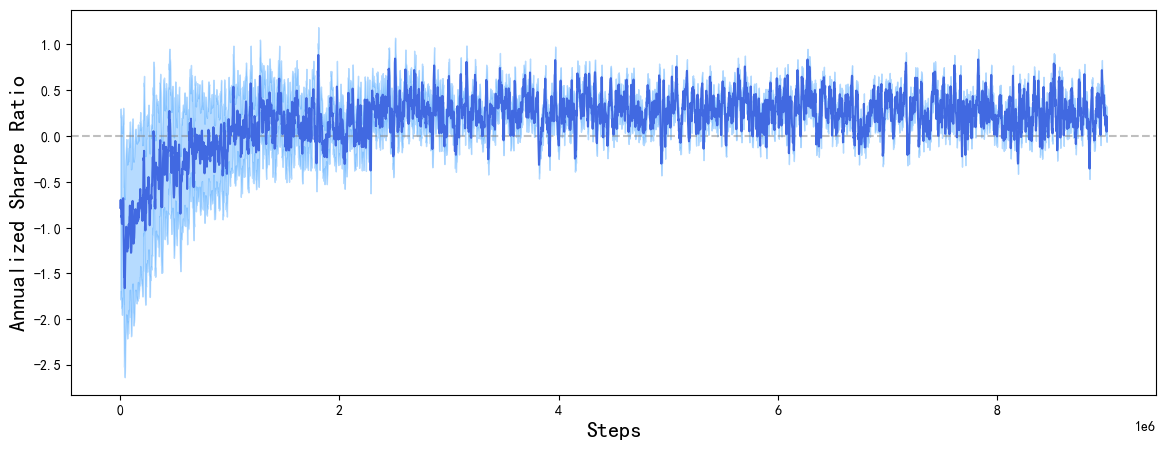

In [10]:
train_log_fig=plt.figure(figsize=(14, 5))
# plt.suptitle('训练效果：平均夏普比率', fontsize=16,va='top',x=0.51,y=0.98)
ax1_stocks = train_log_fig.add_subplot(1, 1, 1)
plt.subplots_adjust(wspace=0.12, hspace=0.25)

# 添加y=0的水平线（在绘制数据之前添加，这样线会在数据下方）
ax1_stocks.axhline(y=0, color='gray', linestyle='--', alpha=0.5) 

ax1_stocks.plot(time_stocks, data_mean_stocks, color='royalblue', label='mean-sharpe'),ax1_stocks.set_xlabel('Steps',fontsize=16)
ax1_stocks.fill_between(time_stocks, data_mean_stocks - data_std_stocks, data_mean_stocks + data_std_stocks, color='dodgerblue', alpha=0.32)
ax1_stocks.set_ylabel('Annualized Sharpe Ratio',fontsize=16)

# ax1_stocks.title.set_text('Stock Portfolio')
# ax1_stocks.set_title('Stock Portfolio', fontsize=16)  # 修改这一行
# plt.legend()
# plt.show()

In [11]:
# 保存为矢量图
train_log_fig.savefig('./img/plot_DRL_trained_log/training_rewards.svg', 
                      bbox_inches='tight',
                      dpi=300,
                      format='svg')